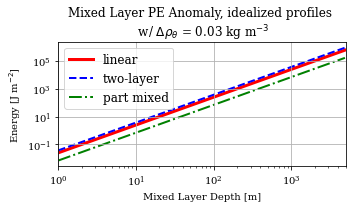

In [1]:
import matplotlib.pyplot as plt
from oceanmixedlayers import oceanmixedlayers
from Paths import Figure_Save_Path
plt.rcParams["font.family"] = "Serif"

A=[];B=[];C=[];Z=[];
for ZB_ in range(1,5000,100):
    #Generate the profile/find pe_anomaly using the oceanmixedlayers package
    A.append(oceanmixedlayers.column(kind='idealized',idealized_type='linear',EOS='Linear',
                              T0=20,dTdz=(0.03/ZB_)/0.2,S0=35,nz=1000,Dpt=ZB_).pe_anomaly(Dpt=-ZB_)[0])
    B.append(oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS='Linear',
                              T0=20,Tb0=20-(0.03)/0.2,nz=1000,Dpt=ZB_).pe_anomaly(Dpt=-ZB_)[0])
    C.append(oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS='Linear',
                              T0=20,Tb0=20,dTdz=(0.03/(ZB_*0.1))/0.2,nz=1000,Dpt=ZB_,mixedfrac=0.9).pe_anomaly(Dpt=-ZB_)[0])
    Z.append(ZB_)

#Create the figure
F,AX = plt.subplots(1,1,figsize=(5,3))
AX.loglog(Z,A,'r',linestyle='-',linewidth=3,zorder=1,label='linear')
AX.loglog(Z,B,'b',linestyle='--',linewidth=2,zorder=1,label='two-layer')
AX.loglog(Z,C,'g',linestyle='-.',linewidth=2,zorder=1,label='part mixed')
AX.set_xlabel('Mixed Layer Depth [m]')
AX.set_ylabel('Energy [J m$^{-2}$]')
AX.set_title('Mixed Layer PE Anomaly, idealized profiles \n'+r' w/ $\Delta \rho_\theta$ = 0.03 kg m$^{-3}$')
AX.grid(True)
AX.set_xlim(1,5000)
AX.legend(fontsize=12)

F.tight_layout()

F.savefig(Figure_Save_Path+'/Figure2_Depth_Phi.png',dpi=300)